# 2023腾讯星火挑战周量子计算方向题目

（内部资料，严禁转发）

## 1 量子计算基础

### 1.1 环境配置

配置一个支持 Python 的环境，使得至少可以跑通如下代码：

2023-08-05 19:19:13.133347: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Please first ``pip install -U cirq`` to enable related functionality in translation module


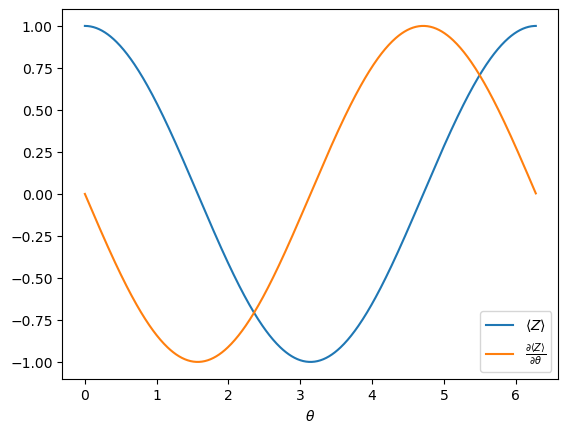

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import tensorcircuit as tc

K = tc.set_backend("tensorflow")


@K.jit
def exp_z(param):
    c = tc.Circuit(1)
    c.rx(0, theta=param)
    return K.real(c.expectation_ps(z=[0]))


grad_z = K.grad(exp_z)

params = K.convert_to_tensor(np.arange(0, 2 * np.pi, 0.01))

plt.plot(params, [exp_z(param) for param in params], label=r"$\langle Z\rangle$")
plt.plot(
    params,
    [grad_z(param) for param in params],
    label=r"$\frac{\partial \langle Z\rangle}{\partial \theta}$",
)
plt.legend()
plt.xlabel(r"$\theta$")
plt.show()

### 1.2 向量和矩阵

#### 1.2.1 矩阵旋转

考虑初始向量 $ v=(1, 0) $ ，给定二维矩阵 $$R(\theta) = \begin{pmatrix} \cos\theta &\sin\theta \\ -\sin\theta & \cos\theta \end{pmatrix}$$，
利用 Numpy 程序实现矩阵乘向量的计算 $v'=R(\theta)v$。通过可视化找到这一向量变化的几何意义。

#### 1.2.2 矩阵指数

理解矩阵指数的含义，程序实现 $e^{i \hat P}$, $\hat{P}=\hat{X}, \hat{Y}, \hat{Z}$. $\hat{X}, \hat{Y}, \hat{Z}$ 是 $2*2$ 泡利矩阵。

考虑泰勒级数展开，试解析证明 $e^{i\theta\hat{P}} = \cos(\theta) I + \mathrm{i}\sin(\theta) \hat{P}$，并程序验证该公式的正确性。

根据解析证明，讨论以上矩阵欧拉公式成立对矩阵 $\hat{P}$ 形式的限制。

#### 1.2.3 矩阵关于向量的期望

定义矩阵 $\hat{Q}$ 关于列向量 $v$ 的期望为以下标量：$$v^\dagger \hat{Q} v$$。
考虑 $v(\theta)=e^{i\theta/2\hat{P}}v_0$, $v_0=(1, 0)$, 且 $\hat{P}, \hat{Q}$ 均是泡利矩阵，实现程序计算该期望。

函数前两个输入为 0,1,2,3 之一的整数，分别确定 P 和 Q 是哪一个泡利矩阵，第三个输入为参数浮点数 $\theta$, 函数的输出为$\hat{Q}$在$\hat{v}$上的期望值。

可视化出不同泡利矩阵组合下期望随参数$\theta$变化的曲线，讨论其规律。

#### 1.2.4 张量积

理解矩阵张量积的含义，$X\otimes I\otimes I\otimes Z$ 可简记为 $X_0Z_3$。
程序生成如下矩阵（输入 n）：

$$H = \sum_{i=0}^{n-1} Z_i + \sum_{i=0}^{n-2} X_iX_{i+1},$$

并求该矩阵 $H$ 在向量 $(1,0,0,....)$ 下的期望值。

#### 1.2.5 狄拉克符号

记列向量 $\vert 0\rangle = \begin{pmatrix}1\\0 \end{pmatrix}$, $\vert 1\rangle = \begin{pmatrix}0\\1 \end{pmatrix}$, $\vert 00\rangle = \begin{pmatrix}1\\0\\0\\0 \end{pmatrix}$，尝试用 Dirac 符号的语言，重写上述小节涉及的矩阵关系和定义式。并写出 $\frac{1}{\sqrt{2}}(\vert 010\rangle -\vert 101\rangle)$ 代表的列向量。

#### 1.2.6 机器学习后端

尝试用 TensorFlow 或 Jax 的 API 或 TensorCircuit 的 API 重写本小节的所有代码。

### 1.3 导数与梯度下降

#### 1.3.1 数值微分

给定任意计算机函数 ``f``， 其输出是一个数值，输入是一个向量（列表），实现一个函数来计算 ``f`` 关于输入向量各分量的导数。这里可以采用数值差分的方式近似实现，也即 $$(f(x+\delta)-f(x))/\delta$$. 

#### 1.3.2 三角函数数值微分

若上述黑盒函数 $f=A\sin(x + B)+C$，通过解析推导找到是否存在严格的数值差分和解析导数相同，也即 $$f'(x) = (f(x+\delta)-f(x-\delta))/\tau$$ 对应的 $\delta, \tau$， 这一方法被称为参数平移。

#### 1.3.3 单比特参数平移

若 $f= \langle 0\vert e^{-i\theta/2\hat{P_1}}P_2e^{i\theta/2\hat{P_1}}\vert 0\rangle$，其中$\hat{P_1}, \hat{P_2}$均为泡利矩阵。尝试用数值微分或参数平移的办法估算 f 对 $\theta$ 的导数。此时参数平移法给出的导数是否正确，为什么？

$f(\theta)$ 是否有周期性？请通过数值观察和理论推导，给出 $f(\theta)$ 化简的解析表达式。

#### 1.3.4 梯度下降

梯度下降是优化函数的常见方法。利用前边我们已知的导数求解方案，结合梯度下降的循环，尝试编程寻找 1.3.3 中函数 $f$ 的最小值。

#### 1.3.5 回到线路

分析 1.1 给出代码的含义与这两题内容的对应。用 TensorCircuit 的方式，从 1.1 给出的代码出发，重新解决 1.3.4 问题。

### 1.4 测量

#### 1.4.1 线路期望计算

给定以下线路，试利用 TensorCircuit API 计算其期望 $\langle Z_0Z_1 \rangle$。

In [74]:
from matplotlib import pyplot as plt
import numpy as np
import tensorcircuit as tc
K = tc.set_backend("tensorflow")
c = tc.Circuit(2)
c.h(0)
c.cx(0, 1)
c.rx(0, theta = 1)
c.draw()
expectation_real = c.expectation_ps(z=[0,1])
expectation_real

<tf.Tensor: shape=(), dtype=complex64, numpy=(0.5403022+0j)>

#### 1.4.2 基于测量结果近似期望

利用 TensorCircuit API 对以上线路进行若干次测量，得到一些 0 1 的比特串的结果，并尝试利用这些测量的 bitstring 来估计期望 $\langle Z_0Z_1 \rangle$。

In [81]:
Z = K.convert_to_tensor([[1+0j,0+0j],[0+0j,-1+0j]])
ZZ = K.kron(Z,Z)
c = tc.Circuit(2)
c.h(0)
c.cx(0, 1)
c.rx(0, theta = 1)
maxstep = 100
select = K.convert_to_tensor([[0,1],[2,3]])
output_list = []
for i in range(maxstep):
    output_ = c.sample(maxstep,True)[i][0]
    k = select[output_[0],output_[1]]
    output_list.append(ZZ[k,k])
expectation_ = K.sum(output_list)/maxstep
expectation_



    



<tf.Tensor: shape=(), dtype=complex128, numpy=(0.6+0j)>

In [57]:
Z = K.convert_to_tensor([[1+0j,0+0j],[0+0j,-1+0j]])
list_of_matrixs = [Z,Z]
n = 2
c = tc.Circuit(n)
c.h(0)
c.cx(0, 1)
c.rx(0, theta = 1)
maxstep = 100
output_list = []
for i in range(maxstep):
    output_ = c.sample(maxstep,True)[i][0]
    expectation=1
    for j in range(n):
        output = output_[j]
        p = list_of_matrixs[j]
        expectation = expectation*p[output,output]
    output_list.append(expectation)
expectation_ = K.sum(output_list)/maxstep
expectation_



<tf.Tensor: shape=(), dtype=complex128, numpy=(0.44+0j)>

/home/tencent/anaconda3/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


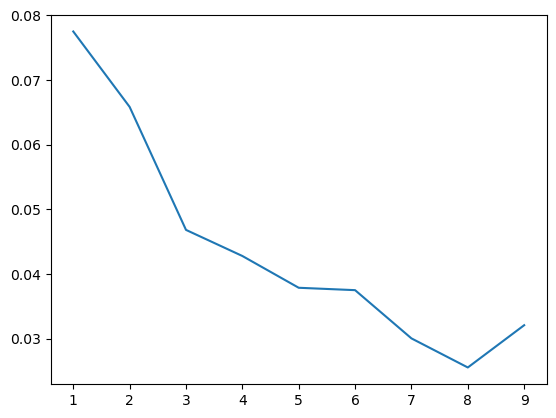

In [104]:
Z = K.cast(K.convert_to_tensor([[1+0j,0+0j],[0+0j,-1+0j]]),dtype="complex128")
list_of_matrixs = [Z,Z]
n = 2
c = tc.Circuit(n)
c.h(0)
c.cx(0, 1)
c.rx(0, theta = 1)
maxstep = 100

def get_expectation(k,list_of_matrixs):
    output_list = []
    maxstep = k
    for i in range(maxstep):
        output_ = c.sample(maxstep,True)[i][0]
        expectation=1
        for j in range(n):
            output = output_[j]
            p = list_of_matrixs[j]
            expectation = expectation*p[output,output]
        output_list.append(expectation)
    expectation_ = K.sum(output_list)/maxstep
    return expectation_
def expectation_loss_mean(k,list_of_matrixs):
    loss_sq_sum = 0
    for _ in range(100):
        # print(get_expectation(k,list_of_matrixs) - K.cast(expectation_real,dtype="complex128"))
        loss_sq_sum = (get_expectation(k,list_of_matrixs) - K.cast(expectation_real,dtype="complex128"))**2 + loss_sq_sum
    return (loss_sq_sum**0.5)/100
input_k = np.arange(1,10)
output_loss = [expectation_loss_mean(i,list_of_matrixs) for i in input_k]
plt.plot(input_k,output_loss)

# expectation_loss_mean(20,list_of_matrixs)

In [108]:
Z = K.cast(K.convert_to_tensor([[1+0j,0+0j],[0+0j,-1+0j]]),dtype="complex128")
list_of_matrixs = [Z,Z]
n = 2
c = tc.Circuit(n)
c.h(0)
c.cx(0, 1)
c.rx(0, theta = 1)
c.sample(maxstep)



[(<tf.Tensor: shape=(2,), dtype=float32, numpy=array([1., 1.], dtype=float32)>,
  <tf.Tensor: shape=(), dtype=float32, numpy=0.38507557>),
 (<tf.Tensor: shape=(2,), dtype=float32, numpy=array([1., 1.], dtype=float32)>,
  <tf.Tensor: shape=(), dtype=float32, numpy=0.38507557>),
 (<tf.Tensor: shape=(2,), dtype=float32, numpy=array([1., 0.], dtype=float32)>,
  <tf.Tensor: shape=(), dtype=float32, numpy=0.11492442>),
 (<tf.Tensor: shape=(2,), dtype=float32, numpy=array([0., 1.], dtype=float32)>,
  <tf.Tensor: shape=(), dtype=float32, numpy=0.11492439>),
 (<tf.Tensor: shape=(2,), dtype=float32, numpy=array([0., 0.], dtype=float32)>,
  <tf.Tensor: shape=(), dtype=float32, numpy=0.38507557>),
 (<tf.Tensor: shape=(2,), dtype=float32, numpy=array([0., 1.], dtype=float32)>,
  <tf.Tensor: shape=(), dtype=float32, numpy=0.11492439>),
 (<tf.Tensor: shape=(2,), dtype=float32, numpy=array([0., 0.], dtype=float32)>,
  <tf.Tensor: shape=(), dtype=float32, numpy=0.38507557>),
 (<tf.Tensor: shape=(2,), d

In [127]:
Z = K.cast(K.convert_to_tensor([[1+0j,0+0j],[0+0j,-1+0j]]),dtype="complex128")
list_of_matrixs = [Z,Z]
n = 2
c = tc.Circuit(n)
c.h(0)
c.cx(0, 1)
c.rx(0, theta = 1)
p = tc.results.counts.normalized_count(c.sample(maxstep,format="count_dict_bin"))
pp = [( np.array(list(i), dtype = int), p[i] ) for i in p]
print(pp)



[(array([0, 0]), 0.31), (array([0, 1]), 0.08), (array([1, 0]), 0.1), (array([1, 1]), 0.51)]


SyntaxError: invalid syntax (3569550852.py, line 1)

#### 1.4.3 测量不确定度

上一小问基于测量结果的期望估计和 1.4.1 的严格结果有一定差异，请分析这一差异随测量次数的标度规律。

### 1.5 量子线路

#### 1.5.1 态生成

用 TensorCircuit 构造 n 比特线路输出如下量子态：

* $\vert 000...\rangle + \vert 111 ...\rangle$

* $\sum_{i=0}^{2^n-1} \vert i\rangle$

* $(U_1+U_2)\vert 0\rangle$, 已知 $U_1$, $U_2$ 是两个给定的幺正线路

#### 1.5.2 多比特下的参数平移

考虑如下参数化线路，可视化变动单一线路参数时的输出变化，分析参数平移求梯度是否依然成立。

In [4]:
def exp_sumz(n, nlayers, param):
    c = tc.Circuit(n)
    for j in range(nlayers):
        for i in range(n):
            c.rx(i, theta=param[i, j])
        for i in range(n - 1):
            c.cnot(i, i + 1)
    return K.real(K.sum([c.expectation_ps(z=[i]) for i in range(n)]))

#### 1.5.3 量子门分解

* 尝试用 cnot 门实现 swap 门

* 尝试用 cnot 门和 Rz 单比特门实现双比特门 Rzz，其中对应矩阵为：

$$Rz(\theta) = e^{-i\theta/2 \hat{Z}}$$
$$Rzz(\theta) = e^{-i\theta/2 \hat{Z}\otimes\hat{Z}}$$

### 1.6 量子算法

Grover search 是利用量子计算机来搜索无结构问题解的平方加速方案。

**注意：** 对于该线路，由于线路深度较深且存在多比特门，我们推荐以下设置来运行模拟。

```python
import cotengra

opt = cotengra.ReusableHyperOptimizer(
    methods=["greedy", "kahypar"],
    parallel="ray",
    minimize="combo",
    max_time=12,
    max_repeats=4096,
    progbar=True,
)
tc.set_contractor("custom", optimizer=opt, contraction_info=True, preprocessing=True)
```

#### 1.6.1 问题 oracle

考虑一个 $3*2$ 的简单格子，每个方格需要填写 0 或 1，使得相邻方格的数字不同，构造该问题的量子线路 oracle，使得输入 6 位比特串，在满足条件时，目标比特输出 1，允许使用辅助比特。

#### 1.6.2 Grover 算法实现

根据以上问题 oracle ，实现 Grover 搜索线路，并根据公式给出合适的迭代次数进行测量。可视化不同迭代次数对测量得到正确结果概率的影响曲线。

#### 1.6.3 未知解个数的 Grover 算法实现 （谨慎选做）

根据参考文献 https://arxiv.org/pdf/quant-ph/9605034.pdf 第四节，实现未知解个数的 Grover 算法实现，并尝试细化其算法复杂度的严格证明。

### 参考文献

* https://arxiv.org/pdf/quant-ph/9605034.pdf

## 2 变分量子算法

分子和多电子自由度固体系统，其精确量子态都占据了指数大的希尔伯特空间。此时经典计算机内存严重限制了我们能模拟问题的规模，而量子计算机则可以直接存储和处理这些量子态，从而实现相比经典计算的量子优势。

我们从如下所示的最简单的横场伊辛模型出发，探讨量子计算机在量子模拟方向的一些应用探索。其哈密顿量如下所示：

$$ H = -\sum_{\langle ij\rangle} Z_iZ_j + h_i \sum_i X_i ，$$

其中 $\langle ij\rangle$ 表示相邻的格点。

### 2.1 变分经典算法

#### 2.1.1 求解方程

实现基于 TensorCircuit jax 或 tf 后端的函数，给定输入 $a, b, c, d$ 输出 $ax^3+bx^2+cx+d=0$ 的解，要求基于变分优化梯度下降的方式。

#### 2.1.2 优化点

给定一组点 $(x_i, y_i)$，要求找到坐标系上到所有点的距离和最近的点的坐标并可视化，基于变分优化梯度下降的方式。（多村庄挖井）

#### 2.1.3 优化线

给定一组点 $(x_i, y_i)$，要求找到坐标系上的一条直线到所有点的距离和最小，基于变分优化梯度下降的方式。（多村庄通公路）

### 2.2 横场伊辛模型基础

#### 2.2.1 哈密顿量

考虑一维N-格点系统，自己实现函数计算上述哈密顿量对应的矩阵（稀疏矩阵、密矩阵）。Tensorcircuit 提供对应的函数 ``tc.quantum.PauliStringSum2COO``， 研究该函数的使用方式，并比较和自己实现的速度区别。

#### 2.2.2 基态能量

求出哈密顿量矩阵对应的最小本征值，也即基态能量。可视化基态能量随 h 的变化 （以下各问均假设各个点 $h_i$ 相同）

#### 2.2.3 基态序参量

计算基态的序参量 $M = \sum_i \langle \vert Z_i\vert\rangle$ 随参数 h 的变化。

#### 2.2.4 严格解 （谨慎选做）

事实上，一维横场伊辛模型严格可解，没有指数墙的限制，可以参阅文献学习如何得到大尺寸横场伊辛模型的严格基态能量。

### 2.3 VQE

#### 2.3.1 线路结构

构建有一层 Hadamard 门和若干层参数化的 rzz 和 rx 门组成的线路假设，并在该线路输出态上计算对应哈密顿量的期望。计算期望的方式可以是稀疏矩阵、Pauli String 求和或 MPO 形式（选做）。试比较其速度区别。

#### 2.3.2 变分原理

哈密顿量矩阵的最小本征值被称为该系统的基态能量 $E_0$。试分析证明对于任何向量（波函数）$\vert\psi\rangle$，我们有 $\langle \psi\vert H\vert\psi\rangle \geq E_0$.

#### 2.3.3 VQE

尝试在上述前向计算参数化线路哈密顿量期望的基础上，构建梯度下降循环优化函数，以最小化哈密顿量期望，得到基态能量的近似。

#### 2.3.4 分析 （选做）

尝试不同的哈密顿量参数，不同的优化超参，不同的线路结构和不同的初始化参数优化等，观察基态能量近似的优劣。

#### 2.3.5 二维 VQE （选做）

考虑二维方格子的横场伊辛模型，构建相应的二维线路结构，来进行 VQE 和能量估计。

### 2.3 时间演化


#### 2.3.1 Trotter 分解

根据薛定谔方程，初态波函数 $\vert \psi_0\rangle$ 在哈密顿量 $H$ 的体系下，会发生演化，在 $t$ 时刻的波函数会变为 $\vert \psi_t\rangle = e^{iHt}\vert \psi_0\rangle$. Trotter 分解指的是，以下式子在 $dt$ 很小的时候成立，

$$e^{i(A+B)dt} = e^{iA dt}e^{iB dt}$$

考虑矩阵函数的泰勒展开定义，试分析以上式子在矩阵 A，B 满足何种条件时严格成立，不满足该条件时，误差关于 $dt$ 是什么量级。

#### 2.3.2 含时演化数值实现

横场 Ising 模型的哈密顿量也可以看做两部分组成，根据 Trotter 分解的想法，将其拆成较小的诸如 $e^{i dt Z_iZ_j}$ 和 $e^{i dt X_i}$ 的乘积项。并程序数值验证这样做的误差（Trotter 分解演化末态和严格矩阵幂对应波函数末态的保真度（内积））与时间片大小 dt 的关系。

#### 2.3.3 含时演化线路实现

以上的小的乘积项，每一项都可以在线路上实现，请基于 Trotter 分解，构造横场伊辛模型的时间演化模拟线路。并可视化 $\langle \psi_t\vert Z_i\vert\psi_t\rangle$ 随时间的变化，对比该曲线和严格薛定谔方程给出的时间演化曲线。

#### 2.3.4 变分含时演化 （选做）

上述 Trotter 分解模拟时间演化的问题是需要的线路在 t 大的时候会很深（试分析为何是这样的）。另一种想法是我们用一个含参数变分线路的末态来近似 $\vert \psi_t\rangle$，对于下一时刻的含时演化态 $\vert \psi_{t+dt}\rangle$ 所需的最佳线路参数，我们通过变分优化最小化以下目标函数实现：

$$  \langle \psi_{t+dt}\vert e^{i dt H}\vert \psi_{t}\rangle $$

试利用 TensorCircuit 实现该变分含时演化方案，并尝试分析其优缺点。

### 参考文献

* https://tensorcircuit.readthedocs.io/en/latest/tutorials/tfim_vqe.html

* https://tensorcircuit.readthedocs.io/en/latest/tutorials/tfim_vqe_diffreph.html


## 3 量子硬件与量子错误消除

TensorCircuit 不仅支持高效的数值模拟，还可以直接调用真实的量子计算机来进行计算，在本节你将学习如何结合真实量子硬件和经典后处理来解决问题。

### 3.1 基础

#### 3.1.1 GHZ 线路取样

构造线路，其目标输出态为 $\vert 0^5\rangle+\vert 1^5\rangle$，数值上模拟该线路的测量结果，并尝试连接真实量子计算机获取相应结果进行对比。

#### 3.1.2 GHZ 线路期望

利用真实量子计算机评估上述 GHZ 态的期望 $\langle \prod_{i=0}^k Z_i \rangle$ (k=1, 2, 3, 4)。

### 3.2 采样读取错误消除


#### 3.2.1 方案

数学上设计和论证读取误差消除方案。提示：获得读取误差强度，构造 confusion matrix。

#### 3.2.2 标定

用 Tensorcircuit 搭建线路获得量子硬件上的读取误差强度，构造 confusion matrix，思考“最节省“量子线路个数的实验方案，以及包含“最完备”读取误差信息的实验方案。

#### 3.2.3 应用

将上一问获取的 confusion matrix 作用于 GHZ 线路的硬件实验结果实现采样层级的错误消除。

### 3.3 期望读取错误消除


#### 3.3.1 利用采样错误消除

应用 3.2 中的读取误差消除方法，提升以上期望值结果准确度。

#### 3.3.2 原生期望错误消除

针对量子线路计算期望值的过程，设计新的读取误差消除方案，要求：无需获得误差消除后的线路测量采样结果。

#### 3.3.3 讨论

理论上讨论和寻找新方案的优势，并设计一些模拟进行验证

### 3.4 大尺寸扩展（选做）

#### 3.4.1 GHZ-16

构造 16 量子比特的 GHZ 线路，计算测量结果，以及在将该 GHZ 线路在量子云模拟器（``device="simulator:tcn1``）上执行，获得硬件实验结果。

#### 3.4.2 采样错误消除扩展

应用 3.2 中的读取错误消除方案，观察是否能够实验错误消除？如果不能，请改进误差消除方案。提示：正确的读取结果往往涵盖在带误差的实验结果中，从而缩减 confusion matrix 的规模。

#### 3.4.2 期望错误消除扩展

对 16 量子比特的 GHZ 线路，测量关联算符的期望值，应用3.3中的方案（或者应用3.4.2中的方案）实现读取误差消除。



## 4 量子编译

本任务的核心是给定一个量子线路 （tensorcircuit 线路对象或 openqasm 序列化），基于硬件芯片的拓扑链接，生成等价的和硬件兼容的线路，扩展可以进一步优化线路的布局，以减少门的总数和噪声的影响。测试线路见下单元格。

### 4.1 芯片拓扑图

定义一个图结构，能够开放输入节点node，节点的权重node_weight，连接connection，连接的权重connection_weight，并能够接受输入的起、止节点编号，输出dijkstra算法的加权距离

### 4.2 任务线路图

定义一个含时图结构集合，可以自由定义时序数目，对时间序列的每个ti，能够自由输入该时刻需要执行的线路操作图，线路图中包含节点操作（对应量子比特单比特运算）和连接操作（对于量子比特双比特运算）两种动作，并打印成图（可以是文字图）

### 4.3 任务图变换

定义一个算法，能够对题目 4.2 中的任务图进行变换，变换的前提是，对某个指定的时序ti，在其线路图上叠加上芯片拓扑图中对应的权重，并对线路图中的每个连接，逐一计算其叠加过来的连接权重，如果芯片拓扑图中无连接，则权重视为无穷大，并对所有无穷大的连接进行变换，将其变换为dijikstra的寻路距离，再次输出变换后的权重

### 4.4 任务执行映射

完善题目 4.3 中的算法，使得对每个前后相连的ti,tj时序，都能实现其变换图的拼接，并输出整体变换后的任务图和其详细的权重数值（注：最原始的拼接方式即是完全忽略ti, tj的前后组合优化空间，全部回归后再变换）

### 4.5 线路图在拓扑图的初始映射优化 （选做）

针对线路图的特征，定义一个算法，能够优化原始的节点直接映射方式下的线路整体运行权重

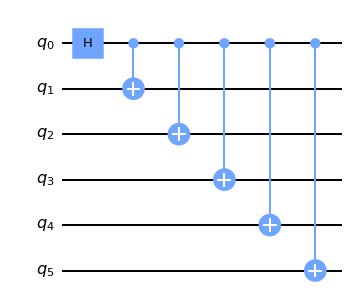

In [9]:
# 题目 4 测试线路

n = 6
c1 = tc.Circuit(n)
c1.h(0)
for i in range(n-1):
    c1.cx(0, i+1)
    
c2 = tc.Circuit(n)
c2.h(0)
for i in range(n-1):
    c2.cx(i, i+1)
    
c3 = tc.Circuit(n)
c3.h(0)
for i in range(0, n-1, 2):
    c3.cx(i, i+1)
for i in range(1, n-1, 2):
    c3.cx(i, i+1)
    
c1.draw(output="mpl")

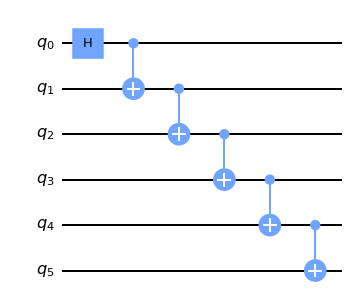

In [11]:
c2.draw(output="mpl")

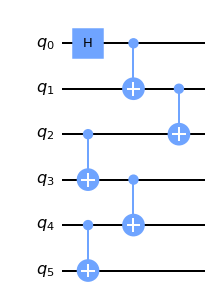

In [12]:
c3.draw(output="mpl")

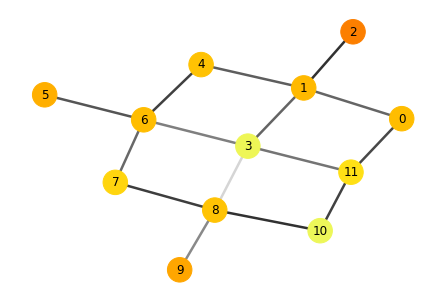

In [14]:
# 测试芯片拓扑如下

tc.cloud.apis.get_device("tianji_s1").topology_graph(visualize=True)

### 5 量子算法量子硬件部署

#### 5.1 X 期望

讨论如何在真实硬件上测量 $\langle X_i\rangle$。

#### 5.2 VQE 能量估计

将第二节对应的最优参数的 VQE 线路提交到真实硬件上计算，并评估相应的能量值。

#### 5.3 结果优化 （选做）

利用包括但不限于比特映射，线路编译，读取错误消除，高级错误缓解，硬件选择等技术，来取得更好的实验结果。使得硬件实验可以逼近精确数值模拟的效果。

### 参考文献

* https://tensorcircuit.readthedocs.io/en/latest/tutorials/qcloud_sdk_demo.html

* https://github.com/tencent-quantum-lab/tensorcircuit/blob/master/docs/source/tutorials/error_mitigation.ipynb

* https://quantum.tencent.com/cloud/tensorcircuit/